In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
from collections import namedtuple
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
input_text = au.read_txt_file_lines()
n_rows = len(input_text)
print(n_rows)

500


In [22]:
Robot = namedtuple('Robot', ['px', 'py', 'vx', 'vy'])
robots_start = []
for l in input_text:
    p, v = l.split()
    p, v = p.lstrip('p='), v.lstrip('v=')
    px, py = p.split(',')
    vx, vy = v.split(',')
    robots_start.append(Robot(int(px), int(py), int(vx), int(vy)))

# robots

In [23]:
w = 101
h = 103
max_it = 100

robots = copy.deepcopy(robots_start)

def move(r):
    pxn = (r.px + r.vx) % w
    pyn = (r.py + r.vy) % h
    return Robot(pxn, pyn, r.vx, r.vy)

def count_quadrants(robots):
    q_tl, q_tr, q_bl, q_br = 0, 0, 0, 0
    x_mid = 50
    y_mid = 51

    for r in robots:
        if r.px < x_mid and r.py < y_mid:
            q_tl += 1
        elif r.px > x_mid and r.py < y_mid:
            q_tr += 1
        elif r.px < x_mid and r.py > y_mid:
            q_bl += 1
        elif r.px > x_mid and r.py > y_mid:
            q_br += 1
        else:
            pass

    return (q_tl, q_tr, q_bl, q_br)

for it in range(max_it):
    for ir, r in enumerate(robots):
        robots[ir] = move(r)

counts = count_quadrants(robots)
np.prod(counts)
        

215476074

## part 2

- First tried some guessing structure wise but didn't work (later turned out I didn't imagine the right structure)
- Then started plotting, saw two vis that stood out, waited till they converged and that was the solution - very cool!

In [42]:

robots = copy.deepcopy(robots_start)

def map_to_mat(robots):
    mat = np.zeros((w, h))

    for r in robots:
        mat[r.px, r.py] = 1

    return mat 

def plot_mat(mat):
    plt.imshow(mat, interpolation='none')

max_it = 100000
for it in range(max_it):
    for ir, r in enumerate(robots):
        robots[ir] = move(r)

    mat = map_to_mat(robots)
    if np.all(mat[50, -5:] == 1):
        plot_mat(map_to_mat(robots))
        print(it)
        assert False

print('no tree!')

no tree!


In [44]:
robots = copy.deepcopy(robots_start)
it_total = 0

no tree!


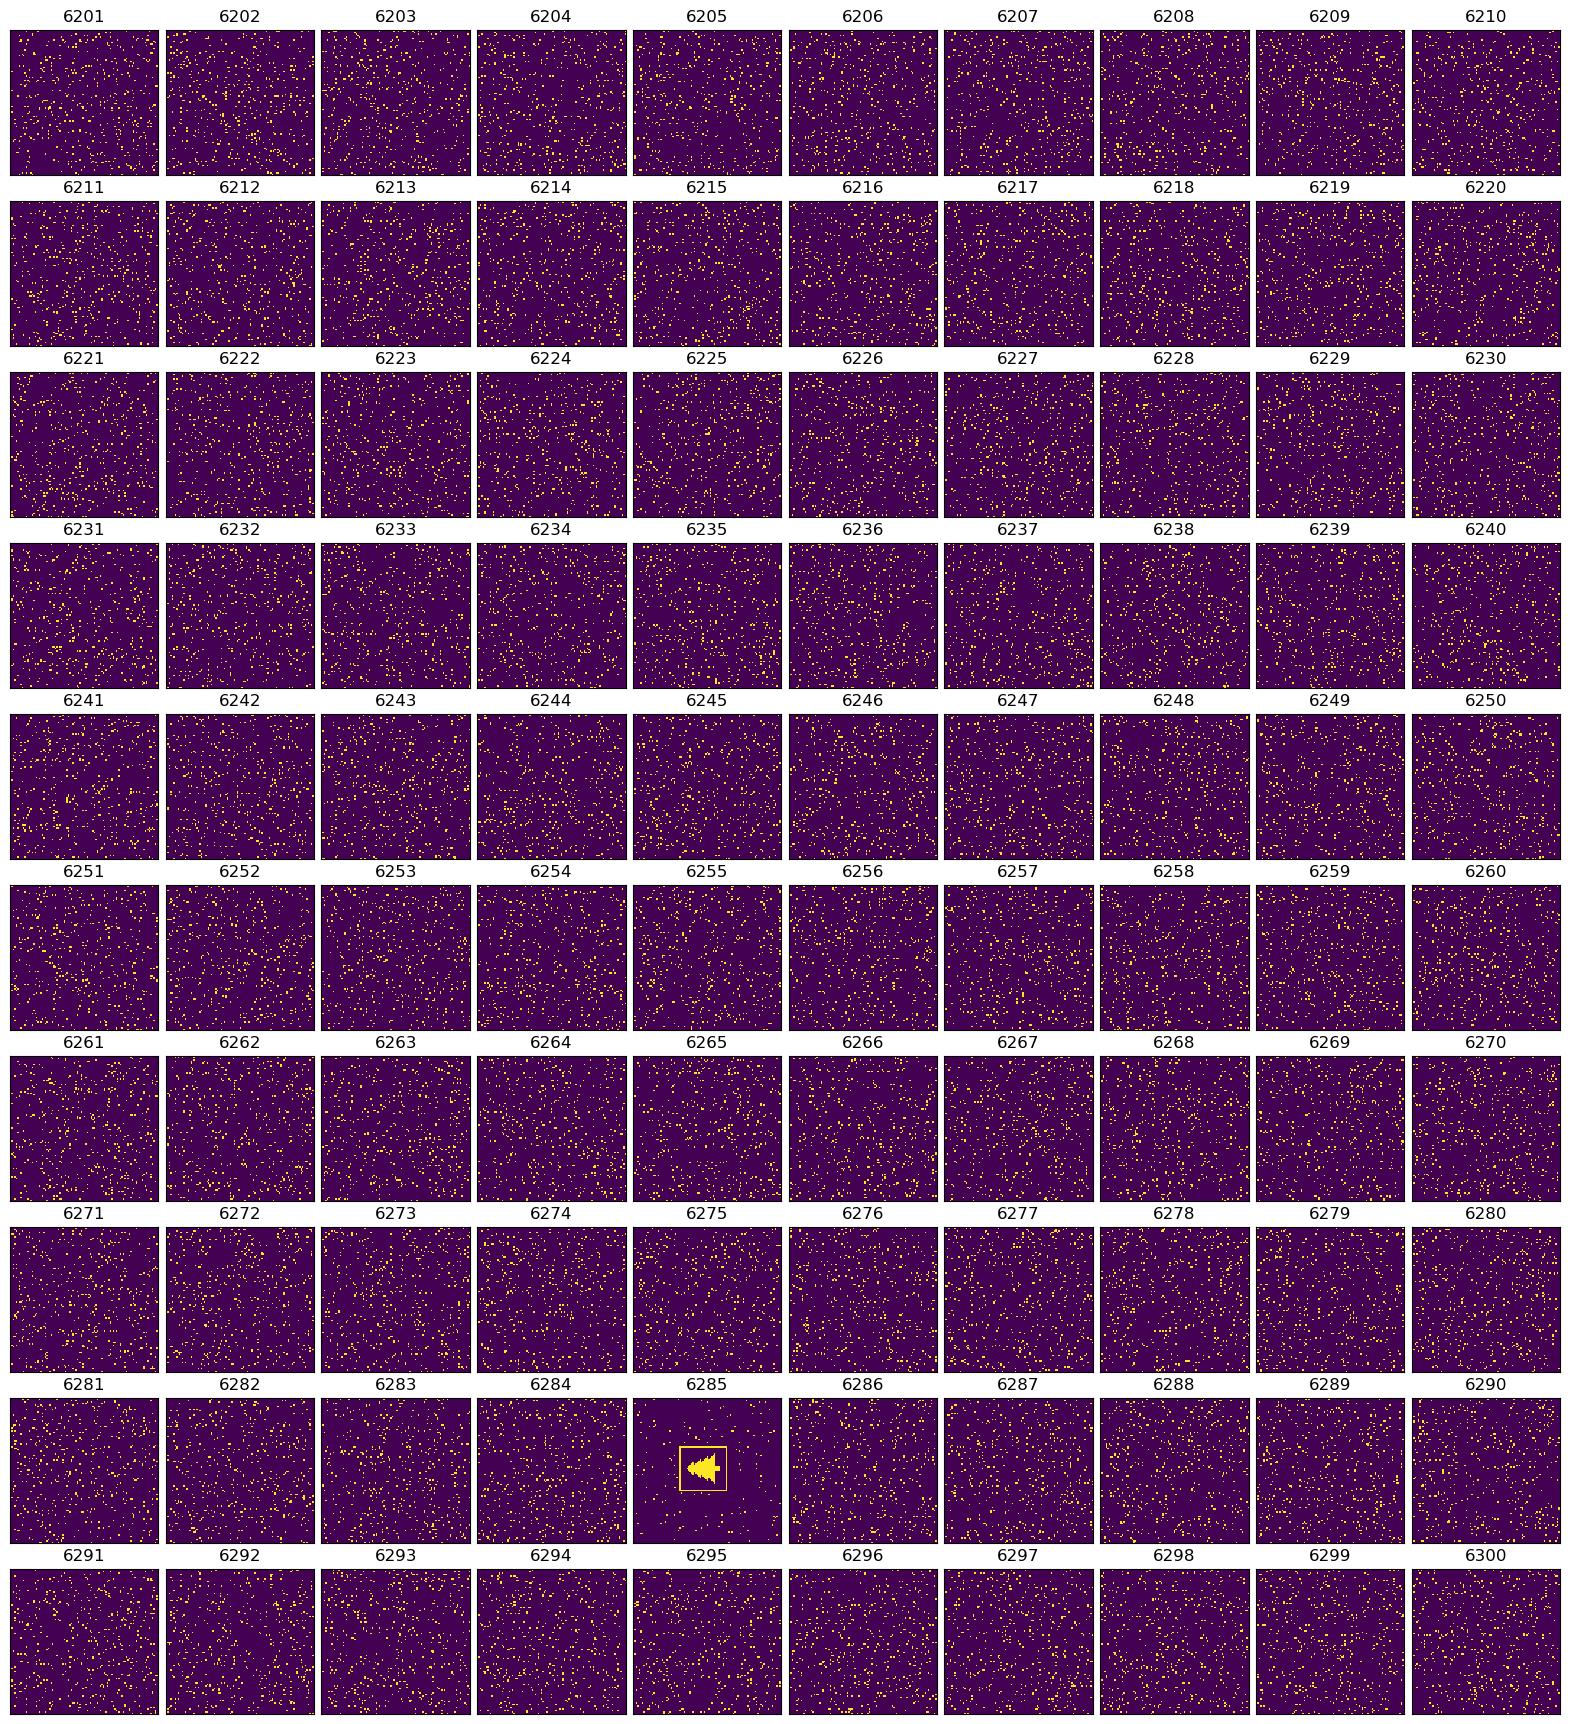

In [107]:

def map_to_mat(robots):
    mat = np.zeros((w, h))

    for r in robots:
        mat[r.px, r.py] = 1

    return mat 

def plot_mat(mat, ax=None):
    if ax is None:
        ax = plt.figure(111)
    ax.imshow(mat, interpolation='none')


fig, ax = plt.subplots(10, 10, figsize=(20, 22), gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
max_it = 100
for it in range(max_it):
    for ir, r in enumerate(robots):
        robots[ir] = move(r)
    it_total += 1

    mat = map_to_mat(robots)
    curr_ax = ax[it // 10, it % 10]
    plot_mat(map_to_mat(robots), curr_ax)
    curr_ax.set_title(it_total)
    curr_ax.set_xticks([])
    curr_ax.set_yticks([])

print('no tree!')